In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Covid Predesposition/covid.csv')

In [3]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [4]:
df_positive = df[df.covid_res==1]
# only covid positive cases are included

In [5]:
df_in_positive = df_positive[df_positive.patient_type==2]
# icu patients are icu inpatients

In [6]:
df_in_positive.icu.value_counts()

2     62388
1      5822
99       86
Name: icu, dtype: int64

In [7]:
df_in_positive = df_in_positive[df_in_positive.icu!=99]
df_in_positive.reset_index(drop=True)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
1,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
2,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
3,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
4,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,1a4ec8,2,2,18-06-2020,11-06-2020,9999-99-99,2,1,67,97,...,2,2,2,2,2,2,2,1,1,2
68206,0a6ada,2,2,29-03-2020,25-03-2020,9999-99-99,1,1,65,97,...,2,1,2,2,1,2,2,2,1,1
68207,16fceb,1,2,29-03-2020,27-03-2020,9999-99-99,2,1,29,2,...,2,2,2,2,2,2,2,2,1,2
68208,27424,1,2,10-06-2020,08-06-2020,10-06-2020,2,1,88,2,...,2,1,2,2,2,2,2,99,1,2


In [8]:
df_in_positive = df_in_positive.drop(['id', 'entry_date', 'date_symptoms', 'date_died','pregnancy'],axis='columns')
df_in_positive = df_in_positive.reset_index(drop=True)
# Drop all columns that are not needed for this exercise 

In [9]:
notagecol = ['patient_type','diabetes','copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease','cardiovascular','obesity','renal_chronic','tobacco','intubed', 'contact_other_covid','covid_res']
# remove all 98's in selected columns
for col in notagecol:
    df_in_positive = df_in_positive[df_in_positive[col]!=98]
    
df_in_positive.reset_index(drop=True)

,sex,patient_type,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,2,2,2,54,2,2,2,2,2,2,2,1,2,2,99,1,2
1,2,2,2,1,30,2,2,2,2,2,2,2,2,2,2,99,1,2
2,1,2,2,2,60,1,2,2,2,1,2,1,2,2,2,99,1,2
3,2,2,2,1,47,1,2,2,2,2,2,2,2,2,2,99,1,1
4,2,2,2,2,63,2,2,2,2,1,2,2,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67295,2,2,2,1,67,2,2,2,2,2,2,2,2,2,2,1,1,2
67296,2,2,1,1,65,1,2,2,2,1,2,2,1,2,2,2,1,1
67297,1,2,2,1,29,2,2,2,2,2,2,2,2,2,2,2,1,2
67298,1,2,2,1,88,1,2,2,2,1,2,2,2,2,2,99,1,2


In [10]:
# replace age with an age range
df_in_positive['age'] = pd.cut(df_in_positive['age'], bins=[0,20,40,60,150], labels=[1,2,3,4])

In [11]:
df_in_positive['age'].value_counts()

3    29908
4    25768
2    10507
1      849
Name: age, dtype: int64

In [12]:
df_in_positive

,sex,patient_type,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,2,2,2,3,2,2,2,2,2,2,2,1,2,2,99,1,2
1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,99,1,2
2,1,2,2,2,3,1,2,2,2,1,2,1,2,2,2,99,1,2
3,2,2,2,1,3,1,2,2,2,2,2,2,2,2,2,99,1,1
4,2,2,2,2,4,2,2,2,2,1,2,2,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2,2,1,4,2,2,2,2,2,2,2,2,2,2,1,1,2
68206,2,2,1,1,4,1,2,2,2,1,2,2,1,2,2,2,1,1
68207,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2
68208,1,2,2,1,4,1,2,2,2,1,2,2,2,2,2,99,1,2


## Filter Methods 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df_in_positive.drop(labels=['icu'],axis=1),df_in_positive['icu'],
    test_size=0.33, random_state=42)

X_train.shape,X_test.shape

((45091, 17), (22209, 17))

### Variance Threshold 
Remove features that doesn't meet a certain threshold, by default, it removes all zero-variance variables, features that have the same value in all samples.

In [15]:

sel = VarianceThreshold(threshold=0)
sel.fit(X_train) # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [16]:
# get_support is a boolean vector that indicates which features are retained
sum(sel.get_support())

15

In [17]:
# print the number of constant features
constant = X_train.columns[~sel.get_support()]
len(constant)

2

In [18]:
constant


Index(['patient_type', 'covid_res'], dtype='object')

In [19]:
# this is true because we chose only inpatients who are covid positive.
for col in constant:
    print(col, X_train[col].unique())

patient_type [2]
covid_res [1]


In [20]:
# We can just drop the 2 variables but this will be laborious if there are numerous variables.
# capture the non-constant features names

feat_names = X_train.columns[sel.get_support()]
test_names = X_test.columns[sel.get_support()]

In [21]:
# use transform() to reduce the training and testing sets
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((45091, 15), (22209, 15))

In [22]:
X_test

array([[ 2,  2,  1, ...,  2,  1,  2],
       [ 1,  2,  1, ...,  2,  2,  2],
       [ 1,  2,  1, ...,  2,  2, 99],
       ...,
       [ 1,  2,  1, ...,  2,  2,  2],
       [ 2,  2,  2, ...,  2,  2, 99],
       [ 2,  2,  1, ...,  2,  2,  2]], dtype=int64)

In [23]:
# VarianceThreshold returns a numpy array without feature names so the dataframe need to be reconstituted

X_train = pd.DataFrame(X_train, columns=feat_names)
X_test = pd.DataFrame(X_test, columns=feat_names)

X_test.head()

,sex,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid
0,2,2,1,4,2,2,2,2,2,2,2,2,2,1,2
1,1,2,1,4,2,1,2,2,1,2,2,1,2,2,2
2,1,2,1,4,2,2,2,2,2,1,2,1,2,2,99
3,2,2,2,4,2,2,2,2,1,2,2,2,2,2,99
4,1,2,2,3,1,2,1,2,1,2,2,1,2,2,2


### Categorical Variables
VarianceThreshold and standard deviation can only be used with numerical variables, so looking for unique values can be used for both categorical and numerical variables

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    df_in_positive.drop(labels=['icu'],axis=1),df_in_positive['icu'],
    test_size=0.33, random_state=42)

X_train.shape,X_test.shape

((45091, 17), (22209, 17))

In [25]:
constant_variables = [feat for feat in X_train.columns if X_train[feat].nunique() ==1]

len(constant_variables)

2

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df_in_positive.drop(labels=['icu'],axis=1),df_in_positive['icu'],
    test_size=0.33, random_state=42)

X_train.shape,X_test.shape

((45091, 17), (22209, 17))

In [27]:
# drop constant variables
X_train.drop(labels=constant_variables, axis=1, inplace=True)
X_test.drop(labels=constant_variables, axis=1, inplace=True)

X_train.shape, X_test.shape

((45091, 15), (22209, 15))

### Quasi-Constant Features
This feature show the same value for a great majority of observations. They provide little, if any information.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    df_in_positive.drop(labels=['icu'],axis=1),df_in_positive['icu'],
    test_size=0.33, random_state=42)

X_train.shape,X_test.shape

((45091, 17), (22209, 17))

In [29]:
sel = VarianceThreshold(threshold=0.01)# variance is more than zero
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [30]:
sum(sel.get_support())

15

### Duplicated features
check if each column has a duplicate

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    df_in_positive.drop(labels=['icu'],axis=1),df_in_positive['icu'],
    test_size=0.33, random_state=42)

X_train.shape,X_test.shape

((45091, 17), (22209, 17))

In [32]:
# check for duplicated pairs

# create an empty dict to store groups of duplicates

duplicated_feat_pairs = {}

# create an empty list to collect features found to be duplicates

dup_feat = []

In [33]:
# iterate over every feature in our dataset:

for i in range(0, len (X_train.columns)):
    
    feat_1 = X_train.columns[i]
    
    # we check if the feature is already identified
    if feat_1 not in dup_feat:
        
        duplicated_feat_pairs[feat_1] = []
        
        # iterate over the reamining features of the dataset:
        
        for feat_2 in X_train.columns[i + 1:]:
            
            # check if this second feature is identical to the first one
            if X_train[feat_1].equals(X_train[feat_2]):
                
                #if it is identical, append it to the list in the dictionary
                duplicated_feat_pairs[feat_1].append(feat_2)
                
                # append it to our monitor list
                dup_feat.append(feat_2)
        
        
        
    

In [34]:
len(dup_feat)

0

### Correlation 
We want the predictors to be correlated to the target and not with each other. Typically linear methods are sensitive to correlation while tree methods are generally robust.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df_in_positive.drop(labels=['icu'],axis=1),df_in_positive['icu'],
    test_size=0.33, random_state=42)

X_train.shape,X_test.shape

((45091, 17), (22209, 17))

<AxesSubplot:>

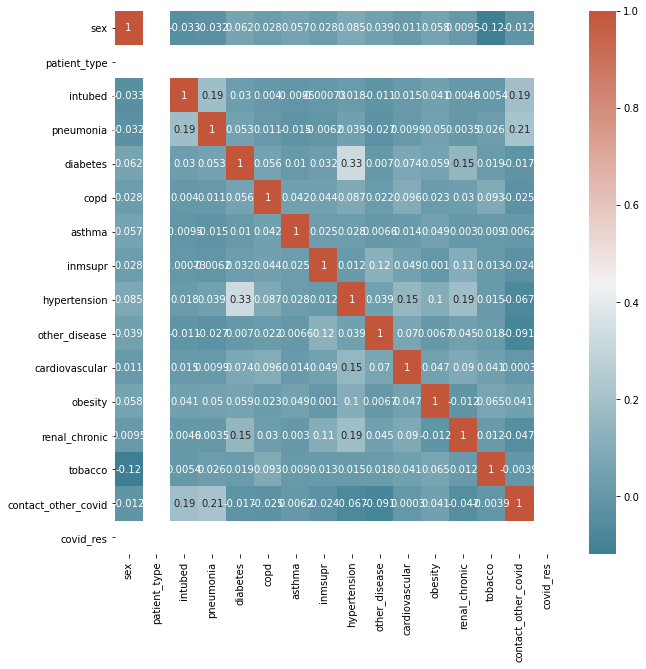

In [36]:
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(X_train.corr(), annot=True, cmap=cmap)

In [39]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=True)
corrmat = corrmat[corrmat <= -0.8]
# corrmat = corrmat[corrmat > -0.1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
